Gi x_0 (mellom -2 og 2):  -1
Gi y_0 (mellom 0 og 4):  1


0


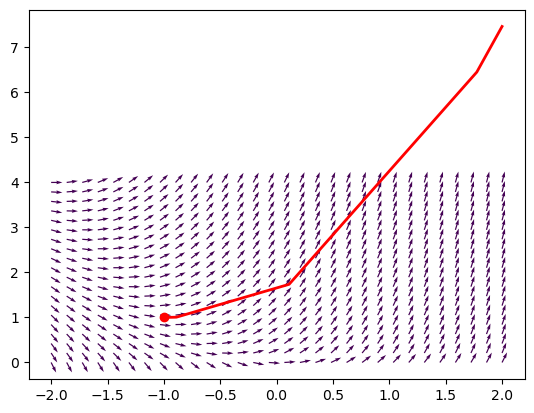

In [34]:
# Erstatter PlottRetningsfelt.m

# Skript som plottar retningsfelt for ei 
# gitt 1. ordens differensiallikning. 
# Det brukar Matplotlib sin quiver-funksjon 
# til å gjere dette.
#
# Ein del "inputs" er hard-koda. Dette gjeld 
# sjølve differensiallikninga, gitt ved 
# funksjonen F(x,y)=y'. Det gjeld også minimal- 
# og maksimal-verdiane til x og y, og det 
# gjeld inndelinga på rutenetet kor mange 
# punkt ein skal ta med for x og y.
# Der er ingen garanti for at løysinga av 
# initialverdiproblemet vil vere 
# avgrensa av dei gitte grensene for x og y.

import numpy as np
import matplotlib.pyplot as plt

# Diff.-likning: y'=F(x,y)
def F(x,y):
    return x + np.sqrt(y)

# Bestemmer intervall for x og y:
x_min = -2
x_max = 2
y_min = 0
y_max = 4

# Set opp rutenettet
x_steps = 30
y_steps = 20           # Talet på punkt i x- og y-retning

# Set opp matriser med x- og y-verdiar
x = np.linspace(x_min, x_max, x_steps)       # Vektor med x-verdiar
y = np.linspace(y_min, y_max, y_steps)       # Vektor med y-verdiar
[X, Y] = np.meshgrid(x, y)                

# Plottar retningsfeltet

U = F(X, Y)                                # Matrise med y'
scale = np.sqrt(1 + U**2)                  # Faktor til å justere lengda på pilene
plt.quiver(X, Y, 1./scale, U/scale, 0.5)   # Plottar retningsfelt

##################################################################################

# Erstatter PlotLoeysinga.m

# Dette skriptet plottar numerisk løysing 
# for ei differensiallikning med gitt 
# startkrav. Til dette brukar skriptet 
# Scipy-funksjonen solve_ivp, som er ein 
# Runge-Kutta-metode.

from scipy.integrate import solve_ivp

# Gir initialkrav:
x0 = float(input(f"Gi x_0 (mellom {x_min} og {x_max}): "))
y0 = float(input(f"Gi y_0 (mellom {y_min} og {y_max}): "))

# Sjekkar at x_0 og y_0 ligg i rektangelet definert frå før
if x0 < x_min or x0 > x_max:
    raise RuntimeError(f"x_0 må ligge mellom {x_min} og {x_max}")
elif y0 < y_min or y0 > y_max:
    raise RuntimeError(f"y_0 må ligge mellom {y_min} og {y_max}")

# Finn løysinga på startverdiproblemet - numerisk
sol = solve_ivp(F, [x0, x_max], [y0])
print(sol.status)

# Plottar løysinga saman med retningsfeltet vi har laga frå før
plt.plot(x0, y0, 'ro', linewidth=2)       # Plottar starverdi
plt.plot(sol.t, sol.y[0], 'r-', linewidth=2) # Plottar løysinga